## [CRQ2] 
Visualize movements and passes on the pitch! Here we try to focus our attention on the zones that a player covers during a match. For each event, we have a pair of coordinates, that are respectively the starting and ending point of that event. It can be helpful to follow this link.

### 1-)PART

In [37]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import Rectangle
from matplotlib.patches import ConnectionPatch,Arc
import seaborn as sns

In [2]:
eventsdata=pd.read_json("../events/events_Spain.json")
eventsdata.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],3542,"[{'y': 61, 'x': 37}, {'y': 50, 'x': 50}]",2565548,Pass,682,1H,2.994582,85,180864419
1,8,Simple pass,[{'id': 1801}],274435,"[{'y': 50, 'x': 50}, {'y': 30, 'x': 45}]",2565548,Pass,682,1H,3.137020,85,180864418
2,8,Simple pass,[{'id': 1801}],364860,"[{'y': 30, 'x': 45}, {'y': 12, 'x': 38}]",2565548,Pass,682,1H,6.709668,85,180864420
3,8,Simple pass,[{'id': 1801}],3534,"[{'y': 12, 'x': 38}, {'y': 69, 'x': 32}]",2565548,Pass,682,1H,8.805497,85,180864421
4,8,Simple pass,[{'id': 1801}],3695,"[{'y': 69, 'x': 32}, {'y': 37, 'x': 31}]",2565548,Pass,682,1H,14.047492,85,180864422


In [3]:
matches_Spain=pd.read_json("matches_Spain.json")
matches_Spain.head()

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
0,Played,4406122,38,"{'676': {'scoreET': 0, 'coachId': 92894, 'side...",181144,2018-05-20 18:45:00,676,Camp Nou,2565922,"Barcelona - Real Sociedad, 1 - 0","May 20, 2018 at 8:45:00 PM GMT+2","[{'refereeId': 398931, 'role': 'referee'}, {'r...",Regular,795
1,Played,4406122,38,"{'679': {'scoreET': 0, 'coachId': 3427, 'side'...",181144,2018-05-20 16:30:00,0,Estadio Wanda Metropolitano,2565925,"Atl\u00e9tico Madrid - Eibar, 2 - 2","May 20, 2018 at 6:30:00 PM GMT+2","[{'refereeId': 395056, 'role': 'referee'}, {'r...",Regular,795
2,Played,4406122,38,"{'691': {'scoreET': 0, 'coachId': 444778, 'sid...",181144,2018-05-20 14:15:00,691,San Mam\u00e9s Barria,2565919,"Athletic Club - Espanyol, 0 - 1","May 20, 2018 at 4:15:00 PM GMT+2","[{'refereeId': 384957, 'role': 'referee'}, {'r...",Regular,795
3,Played,4406122,38,"{'674': {'scoreET': 0, 'coachId': 210074, 'sid...",181144,2018-05-20 10:00:00,674,Estadio de Mestalla,2565924,"Valencia - Deportivo La Coru\u00f1a, 2 - 1","May 20, 2018 at 12:00:00 PM GMT+2","[{'refereeId': 398913, 'role': 'referee'}, {'r...",Regular,795
4,Played,4406122,38,"{'675': {'scoreET': 0, 'coachId': 275283, 'sid...",181144,2018-05-19 18:45:00,0,Estadio de la Cer\u00e1mica,2565927,"Villarreal - Real Madrid, 2 - 2","May 19, 2018 at 8:45:00 PM GMT+2","[{'refereeId': 395085, 'role': 'referee'}, {'r...",Regular,795


In [4]:
for c,i in enumerate(matches_Spain.dateutc,0):
    matches_Spain.loc[c,"dateutc"]=datetime.strptime(i,"%Y-%m-%d %H:%M:%f").strftime("%Y-%m-%d")

In [5]:
matches_Spain[(matches_Spain["dateutc"]== "2018-05-06")].loc[23]

status                                                      Played
roundId                                                    4406122
gameweek                                                        36
teamsData        {'675': {'scoreET': 0, 'coachId': 275283, 'sid...
seasonId                                                    181144
dateutc                                                 2018-05-06
winner                                                           0
venue                                                     Camp Nou
wyId                                                       2565907
label                               Barcelona - Real Madrid, 2 - 2
date                               May 6, 2018 at 8:45:00 PM GMT+2
referees         [{'refereeId': 378950, 'role': 'referee'}, {'r...
duration                                                   Regular
competitionId                                                  795
Name: 23, dtype: object

In [6]:
#barce
matchbetween=eventsdata[eventsdata["matchId"]==2565907]
matchbetween.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
593455,8,Simple pass,[{'id': 1801}],3321,"[{'y': 49, 'x': 50}, {'y': 40, 'x': 37}]",2565907,Pass,675,1H,3.274992,85,249644096
593456,8,Simple pass,[{'id': 1801}],14723,"[{'y': 40, 'x': 37}, {'y': 23, 'x': 30}]",2565907,Pass,675,1H,5.109197,85,249644097
593457,8,Simple pass,[{'id': 1801}],3306,"[{'y': 23, 'x': 30}, {'y': 57, 'x': 26}]",2565907,Pass,675,1H,7.109958,85,249644098
593458,8,Simple pass,[{'id': 1801}],3309,"[{'y': 57, 'x': 26}, {'y': 40, 'x': 8}]",2565907,Pass,675,1H,8.912297,85,249644099
593459,8,Simple pass,[{'id': 1801}],3915,"[{'y': 40, 'x': 8}, {'y': 14, 'x': 11}]",2565907,Pass,675,1H,11.290220,85,249644100


In [15]:
player_data=pd.read_json("../players.json")
player_data.head()

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,,Tekin,4502,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,,Sarr,3775,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",72,Over,,Mandanda,3772,1998-10-26,176,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'France', 'id': '250', 'alpha3code': ...",393230,,O. Mandanda,null
3,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",82,Alfred John Momar,,N'Diaye,683,1990-03-06,187,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'France', 'id': '250', 'alpha3code': ...",32793,right,A. N'Diaye,19314
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",84,Ibrahima,,Konat\u00e9,2975,1999-05-25,192,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393247,right,I. Konat\u00e9,null


In [62]:
ronaldowyid=player_data[player_data["firstName"]=="Cristiano Ronaldo"]["wyId"].values
interestofdata=matchbetween[matchbetween["playerId"]==ronaldowyid[0]]

# The events to be considered are: passes, shoots, duels, free kicks.
ronaldo=interestofdata[interestofdata["eventName"].isin(["Duel","Pass","Shot","Free Kick"])]
ronaldo.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
593473,1,Ground loose ball duel,"[{'id': 702}, {'id': 1801}]",3322,"[{'y': 19, 'x': 49}, {'y': 17, 'x': 49}]",2565907,Duel,675,1H,68.618689,13,249644112
593475,1,Air duel,"[{'id': 701}, {'id': 1802}]",3322,"[{'y': 17, 'x': 49}, {'y': 19, 'x': 38}]",2565907,Duel,675,1H,69.411334,10,249644113
593497,1,Ground defending duel,"[{'id': 701}, {'id': 1802}]",3322,"[{'y': 13, 'x': 65}, {'y': 23, 'x': 53}]",2565907,Duel,675,1H,114.548692,12,249644119
593552,1,Ground attacking duel,"[{'id': 502}, {'id': 703}, {'id': 1801}]",3322,"[{'y': 12, 'x': 93}, {'y': 8, 'x': 97}]",2565907,Duel,675,1H,275.327960,11,249644145
593554,8,Cross,"[{'id': 401}, {'id': 801}, {'id': 1802}]",3322,"[{'y': 8, 'x': 97}, {'y': 100, 'x': 100}]",2565907,Pass,675,1H,277.578035,80,249644146


In [77]:
messiwyid=player_data[player_data["shortName"]=="L. Messi"]["wyId"].values
interestofdata=matchbetween[matchbetween["playerId"]==messiwyid[0]]
# The events to be considered are: passes, shoots, duels, free kicks.
messi=interestofdata[interestofdata["eventName"].isin(["Duel","Pass","Shot","Free Kick"])]
messi.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
593485,8,Simple pass,[{'id': 1801}],3359,"[{'y': 87, 'x': 74}, {'y': 91, 'x': 80}]",2565907,Pass,676,1H,85.701277,85,249644574
593489,8,Simple pass,[{'id': 1801}],3359,"[{'y': 87, 'x': 67}, {'y': 71, 'x': 43}]",2565907,Pass,676,1H,92.114223,85,249644578
593499,8,Simple pass,[{'id': 1801}],3359,"[{'y': 66, 'x': 58}, {'y': 78, 'x': 75}]",2565907,Pass,676,1H,117.241765,85,249644587
593501,1,Ground attacking duel,"[{'id': 702}, {'id': 1801}]",3359,"[{'y': 67, 'x': 65}, {'y': 38, 'x': 63}]",2565907,Duel,676,1H,122.168204,11,249644589
593503,8,Simple pass,[{'id': 1801}],3359,"[{'y': 38, 'x': 63}, {'y': 43, 'x': 69}]",2565907,Pass,676,1H,124.686582,85,249644590


In [296]:
def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = Rectangle([0,0], width = 120, height = 80, fill = False)
    #Left, Right Penalty Area and midline
    LeftPenalty = Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False)
    RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)
    midline = ConnectionPatch([60,0], [60,80], "data", "data")

    #Left, Right 6-yard Box
    LeftSixYard = Rectangle([0,32], width = 4.9, height = 16, fill = False)
    RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

## Cristiano Ronaldo and L.Messi positon  graphs

Text(0.5, 1.0, 'L. Messi')

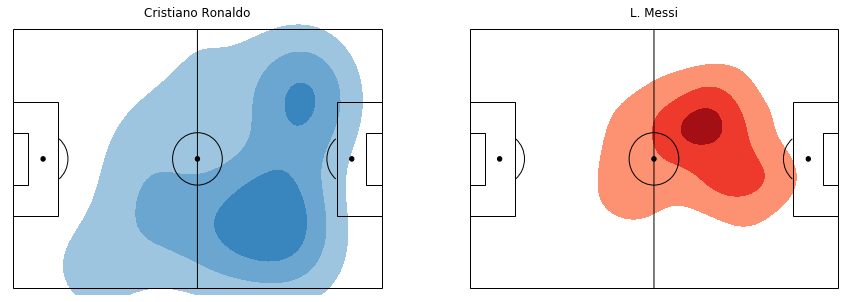

In [297]:
fig=plt.figure() #set up the figures
fig.set_size_inches(15, 5)
ax0=plt.subplot(1,2,1)
draw_pitch(ax0) #overlay our different objects on the pitch
sns.kdeplot([i[0]["x"] for i in ronaldo.positions], [i[0]["y"] for i in ronaldo.positions],
            n_levels=3,shade=True,shade_lowest=False)
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('off')
plt.title("Cristiano Ronaldo")
ax1=plt.subplot(1,2,2)
draw_pitch(ax1) #overlay our different objects on the pitch
sns.kdeplot([i[0]["x"]*1.2 for i in messi.positions], [i[0]["y"]*0.8 for i in messi.positions],
            shade=True,cmap="Reds",n_levels=3,shade_lowest=False)
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('off')
plt.title("L. Messi")


### PART-2 

In [108]:
italy_matches=pd.read_json("matches_Italy.json")
italy_matches.head()

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
0,Played,4406278,38,"{'3162': {'scoreET': 0, 'coachId': 251025, 'si...",181248,2018-05-20 18:45:00,3161,,2576335,"Lazio - Internazionale, 2 - 3","May 20, 2018 at 8:45:00 PM GMT+2","[{'refereeId': 377206, 'role': 'referee'}, {'r...",Regular,524
1,Played,4406278,38,"{'3158': {'scoreET': 0, 'coachId': 210119, 'si...",181248,2018-05-20 18:45:00,3158,MAPEI Stadium - Citt\u00e0 del Tricolore,2576336,"Sassuolo - Roma, 0 - 1","May 20, 2018 at 8:45:00 PM GMT+2","[{'refereeId': 377255, 'role': 'referee'}, {'r...",Regular,524
2,Played,4406278,38,"{'3173': {'scoreET': 0, 'coachId': 251044, 'si...",181248,2018-05-20 16:00:00,3173,,2576329,"Cagliari - Atalanta, 1 - 0","May 20, 2018 at 6:00:00 PM GMT+2","[{'refereeId': 377247, 'role': 'referee'}, {'r...",Regular,524
3,Played,4406278,38,"{'3165': {'scoreET': 0, 'coachId': 272970, 'si...",181248,2018-05-20 16:00:00,3165,,2576330,"Chievo - Benevento, 1 - 0","May 20, 2018 at 6:00:00 PM GMT+2","[{'refereeId': 377246, 'role': 'referee'}, {'r...",Regular,524
4,Played,4406278,38,"{'3166': {'scoreET': 0, 'coachId': 20481, 'sid...",181248,2018-05-20 16:00:00,3163,,2576331,"Udinese - Bologna, 1 - 0","May 20, 2018 at 6:00:00 PM GMT+2","[{'refereeId': 377254, 'role': 'referee'}, {'r...",Regular,524


In [114]:
liste=[]
for index,i in enumerate(italy_matches['dateutc'],0):
    liste.append(datetime.strptime(italy_matches.loc[index,"dateutc"],"%Y-%m-%d %H:%M:%f").strftime("%Y-%m-%d"))
italy_matches["dateutc"]=liste    

In [116]:
italy_matches.head()

In [128]:
interestofdata=italy_matches[italy_matches["dateutc"]=="2018-04-22"].reset_index(drop=True)
matchid=interestofdata.loc[0,"wyId"]

In [125]:
events_italy=pd.read_json("../events/events_Italy.json")
events_italy.head(5)

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],8327,"[{'y': 52, 'x': 49}, {'y': 44, 'x': 43}]",2575959,Pass,3158,1H,2.530536,85,180423957
1,8,Simple pass,[{'id': 1801}],20438,"[{'y': 44, 'x': 43}, {'y': 17, 'x': 36}]",2575959,Pass,3158,1H,3.768418,85,180423958
2,7,Touch,[],8306,"[{'y': 17, 'x': 36}, {'y': 56, 'x': 78}]",2575959,Others on the ball,3158,1H,4.868265,72,180423959
3,1,Ground attacking duel,"[{'id': 504}, {'id': 703}, {'id': 1801}]",8306,"[{'y': 56, 'x': 78}, {'y': 15, 'x': 64}]",2575959,Duel,3158,1H,8.114676,11,180423960
4,1,Ground attacking duel,"[{'id': 503}, {'id': 703}, {'id': 1801}]",8306,"[{'y': 15, 'x': 64}, {'y': 15, 'x': 72}]",2575959,Duel,3158,1H,8.647892,11,180423961


In [131]:
juve_napoli=events_italy[events_italy["matchId"]==matchid]
pass_event=juve_napoli[juve_napoli["eventName"]=="Pass"]
pass_event

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
573095,8,Simple pass,[{'id': 1801}],21385,"[{'y': 50, 'x': 50}, {'y': 53, 'x': 38}]",2576295,Pass,3187,1H,1.265726,85,245487374
573096,8,Simple pass,[{'id': 1801}],3300,"[{'y': 53, 'x': 38}, {'y': 52, 'x': 38}]",2576295,Pass,3187,1H,2.087491,85,245487375
573097,8,High pass,[{'id': 1802}],25726,"[{'y': 52, 'x': 38}, {'y': 100, 'x': 82}]",2576295,Pass,3187,1H,3.184110,83,245487376
573100,8,Simple pass,[{'id': 1801}],20461,"[{'y': 35, 'x': 3}, {'y': 76, 'x': 8}]",2576295,Pass,3159,1H,13.179059,85,245487370
573101,8,Simple pass,[{'id': 1801}],20579,"[{'y': 76, 'x': 8}, {'y': 93, 'x': 13}]",2576295,Pass,3159,1H,15.953909,85,245487371
...,...,...,...,...,...,...,...,...,...,...,...,...
574819,8,Simple pass,[{'id': 1801}],25437,"[{'y': 65, 'x': 73}, {'y': 64, 'x': 73}]",2576295,Pass,3159,2H,2895.696896,85,245488981
574820,8,Head pass,[{'id': 1801}],20443,"[{'y': 64, 'x': 73}, {'y': 97, 'x': 72}]",2576295,Pass,3159,2H,2897.428025,82,245488982
574821,8,Cross,"[{'id': 402}, {'id': 801}, {'id': 1802}]",20751,"[{'y': 97, 'x': 72}, {'y': 49, 'x': 85}]",2576295,Pass,3159,2H,2899.193081,80,245488983
574826,8,Head pass,"[{'id': 1401}, {'id': 1801}]",99902,"[{'y': 14, 'x': 65}, {'y': 6, 'x': 68}]",2576295,Pass,3187,2H,2941.102559,82,245489179


In [290]:
jorgino=player_data[player_data["shortName"]=="Jorginho"]["wyId"].values[0]
jorgino_pass=pass_event[pass_event["playerId"]==jorgino]
jorgino_pass.reset_index(drop=True,inplace=True)
jorgino_pass["pass_start"]=[i[0] for i in jorgino_pass["positions"]]
jorgino_pass["pass_end"]=[i[1] for i in jorgino_pass["positions"]]
jorgino_pass.head()

C:\Users\vedat\Anaconda3\envs\DataScience\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\vedat\Anaconda3\envs\DataScience\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,pass_start,pass_end
0,8,Simple pass,[{'id': 1801}],21315,"[{'y': 75, 'x': 47}, {'y': 71, 'x': 62}]",2576295,Pass,3187,1H,166.338197,85,245487404,"{'y': 75, 'x': 47}","{'y': 71, 'x': 62}"
1,8,Head pass,"[{'id': 1401}, {'id': 1802}]",21315,"[{'y': 44, 'x': 71}, {'y': 42, 'x': 69}]",2576295,Pass,3187,1H,206.466357,82,245487433,"{'y': 44, 'x': 71}","{'y': 42, 'x': 69}"
2,8,Simple pass,[{'id': 1801}],21315,"[{'y': 72, 'x': 47}, {'y': 96, 'x': 61}]",2576295,Pass,3187,1H,250.114192,85,245487461,"{'y': 72, 'x': 47}","{'y': 96, 'x': 61}"
3,8,Simple pass,[{'id': 1801}],21315,"[{'y': 28, 'x': 57}, {'y': 33, 'x': 77}]",2576295,Pass,3187,1H,446.557147,85,245487500,"{'y': 28, 'x': 57}","{'y': 33, 'x': 77}"
4,8,Simple pass,[{'id': 1801}],21315,"[{'y': 25, 'x': 61}, {'y': 13, 'x': 74}]",2576295,Pass,3187,1H,456.587989,85,245487506,"{'y': 25, 'x': 61}","{'y': 13, 'x': 74}"


In [176]:
miralem=player_data[player_data["firstName"]=="Miralem"]["wyId"].values[0]
miralem_pass=pass_event[pass_event["playerId"]==miralem]
miralem_pass.reset_index(drop=True,inplace=True)
miralem_pass["pass_start"]=[i[0] for i in miralem_pass["positions"]]
miralem_pass["pass_end"]=[i[1] for i in miralem_pass["positions"]]


C:\Users\vedat\Anaconda3\envs\DataScience\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\vedat\Anaconda3\envs\DataScience\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [177]:
miralem_pass.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,pass_start,pass_end
0,8,Simple pass,[{'id': 1801}],20443,"[{'y': 55, 'x': 28}, {'y': 2, 'x': 39}]",2576295,Pass,3159,1H,26.160914,85,245487395,"{'y': 55, 'x': 28}","{'y': 2, 'x': 39}"
1,8,High pass,[{'id': 1801}],20443,"[{'y': 30, 'x': 31}, {'y': 84, 'x': 31}]",2576295,Pass,3159,1H,33.120179,83,245487399,"{'y': 30, 'x': 31}","{'y': 84, 'x': 31}"
2,8,Simple pass,"[{'id': 1401}, {'id': 1801}]",20443,"[{'y': 62, 'x': 63}, {'y': 47, 'x': 63}]",2576295,Pass,3159,1H,120.169376,85,245487410,"{'y': 62, 'x': 63}","{'y': 47, 'x': 63}"
3,8,Simple pass,"[{'id': 1401}, {'id': 1001}, {'id': 1802}]",20443,"[{'y': 26, 'x': 25}, {'y': 0, 'x': 31}]",2576295,Pass,3159,1H,352.941005,85,245487509,"{'y': 26, 'x': 25}","{'y': 0, 'x': 31}"
4,8,Simple pass,[{'id': 1801}],20443,"[{'y': 51, 'x': 26}, {'y': 76, 'x': 13}]",2576295,Pass,3159,1H,432.992312,85,245487518,"{'y': 51, 'x': 26}","{'y': 76, 'x': 13}"


## Miralem and Jorginio Pass Graphs

(-2.0, 122.0, -2.0, 82.0)

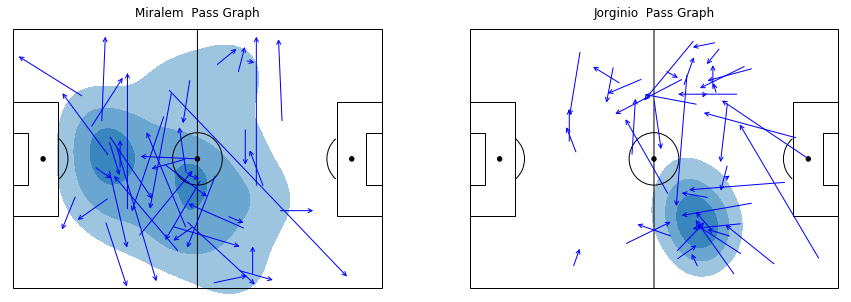

In [301]:
fig=plt.figure() #set up the figures
fig.set_size_inches(15, 5)
ax0=plt.subplot(1,2,1)
draw_pitch(ax0) #overlay our different objects on the pitch
sns.kdeplot([i[0]["x"]*1.2 for i in miralem_pass.positions], [i[0]["y"]*0.8 for i in miralem_pass.positions],
            n_levels=3,shade=True,shade_lowest=False)
for i in range(miralem_pass.shape[0]):
    ax0.annotate("", xy =(miralem_pass.loc[i,"pass_end"]["x"]*1.2,miralem_pass.loc[i,"pass_end"]["y"]*0.8),
                 xytext = (miralem_pass.loc[i,"pass_start"]["x"]*1.2,miralem_pass.loc[i,"pass_start"]["y"]*0.8), 
                 arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"))
plt.title("Miralem  Pass Graph")
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('off')
ax1=plt.subplot(1,2,2)
draw_pitch(ax1) #overlay our different objects on the pitch
sns.kdeplot([i[0]["x"]*1.2 for i in jorgino_pass.positions], [i[0]["y"]*0.8 for i in jorgino_pass.positions],
            n_levels=3,shade=True,shade_lowest=False)
plt.title("Jorginio  Pass Graph")
for i in range(miralem_pass.shape[0]):
    ax1.annotate("", xy =(jorgino_pass.loc[i,"pass_start"]["x"]*1.2,jorgino_pass.loc[i,"pass_start"]["y"]*0.8),
                 xytext = (jorgino_pass.loc[i,"pass_end"]["x"]*1.2,jorgino_pass.loc[i,"pass_end"]["y"]*0.8), 
                 arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"))
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('off')